In [1]:
import pickle
import numpy
import matplotlib.pylab as plt
%config InlineBackend.figure_format = 'retina'
plt.style.use("https://raw.githubusercontent.com/NeuromatchAcademy/course-content/master/nma.mplstyle")
from datetime import datetime


with open('pop_rate_0809_18_51.pkl', 'rb') as f:
    data = pickle.load(f)

In [2]:
def get_decision_time(pop_rate, threshold=25):
    rate_A = pop_rate['pop_rate_a']
    rate_B = pop_rate['pop_rate_b']
    
    above_thre_A = (pop_rate['pop_rate_a'] > threshold)
    idx_over_threshold_A = numpy.where(above_thre_A==True)


    above_thre_B = (pop_rate['pop_rate_b'] > threshold)
    idx_over_threshold_B = numpy.where(above_thre_B==True)


    # monitor each firing rate at every moment 
    decision_time_A = 0

    decision_time_B = 0

    for i in range(len(above_thre_A)):

        # find the time when the divergen starts happening

        above_thre_A = (rate_A > threshold)
        idx_over_threshold_A = numpy.where(above_thre_A==True)


        above_thre_B = (rate_B > threshold)
        idx_over_threshold_B = numpy.where(above_thre_B==True)



    if len(idx_over_threshold_A[0]) > 0:
        decision_time_A = idx_over_threshold_A[0][0];
        
    else: 
        pass

    if len(idx_over_threshold_B[0]) > 0:
        decision_time_B = idx_over_threshold_B[0][0];

    else: 
        pass
    

    #print(decision_time_A, decision_time_B)
    return decision_time_A, decision_time_B



In [3]:
def plot_rate(pop_rate):
    rate_a = pop_rate['pop_rate_a']
    rate_b = pop_rate['pop_rate_b']
    time = pop_rate['time']
    plt.rcParams['font.size'] = 18

    
    
    plt.plot(time, rate_a,  linewidth= 2.5)
    plt.plot(time, rate_b, linewidth= 2.5)
    plt.ylabel('Firing rate (Spikes/s)')
    plt.xlabel('time (ms)')
    plt.legend(['Population A', 'Population B'])
    plt.show()


In [4]:
decision_times = []
rt = []

for i in range(len(data)):
    
    decision_time = get_decision_time(data[i])
    
    decision_times.append(decision_time)
    rt.append(max(decision_time))
        

In [5]:
curDT = datetime.now()
time = curDT.strftime("%m%d_%H_%M")

with open('100_decision_time_' + time + '.pkl', 'wb') as f:
    pickle.dump(rt, f)

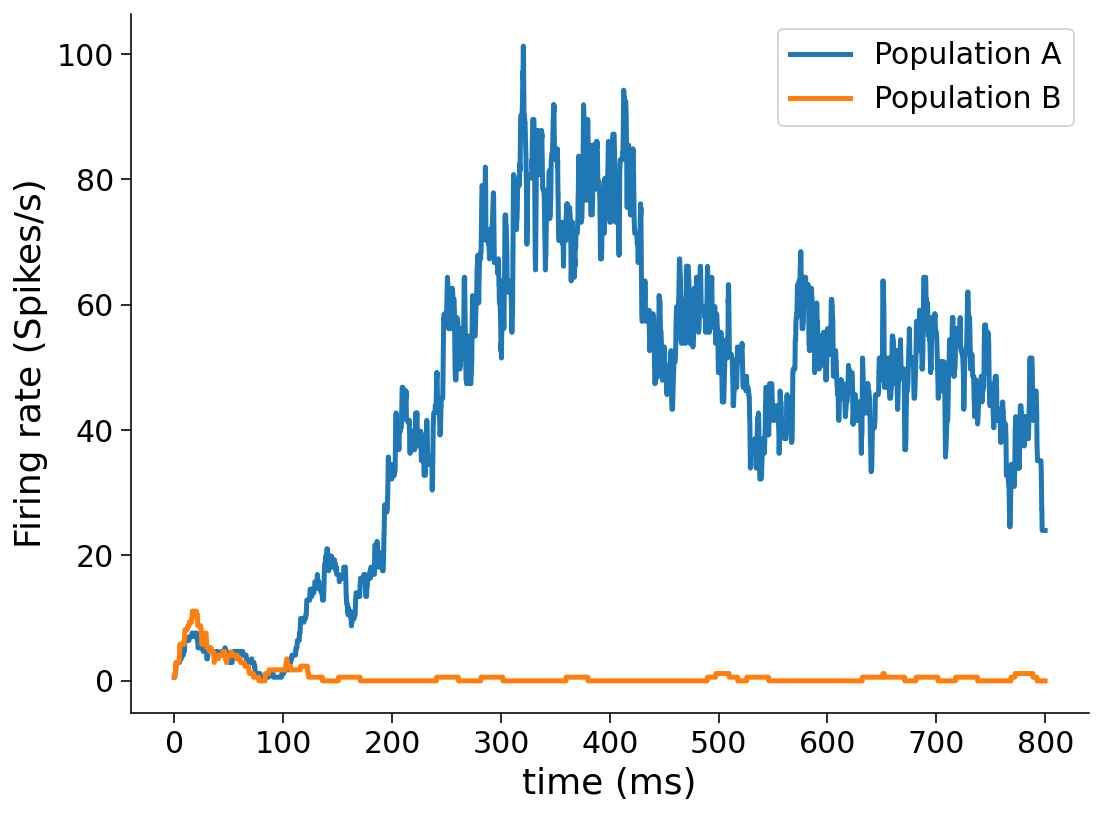

In [6]:
plot_rate(data[2])


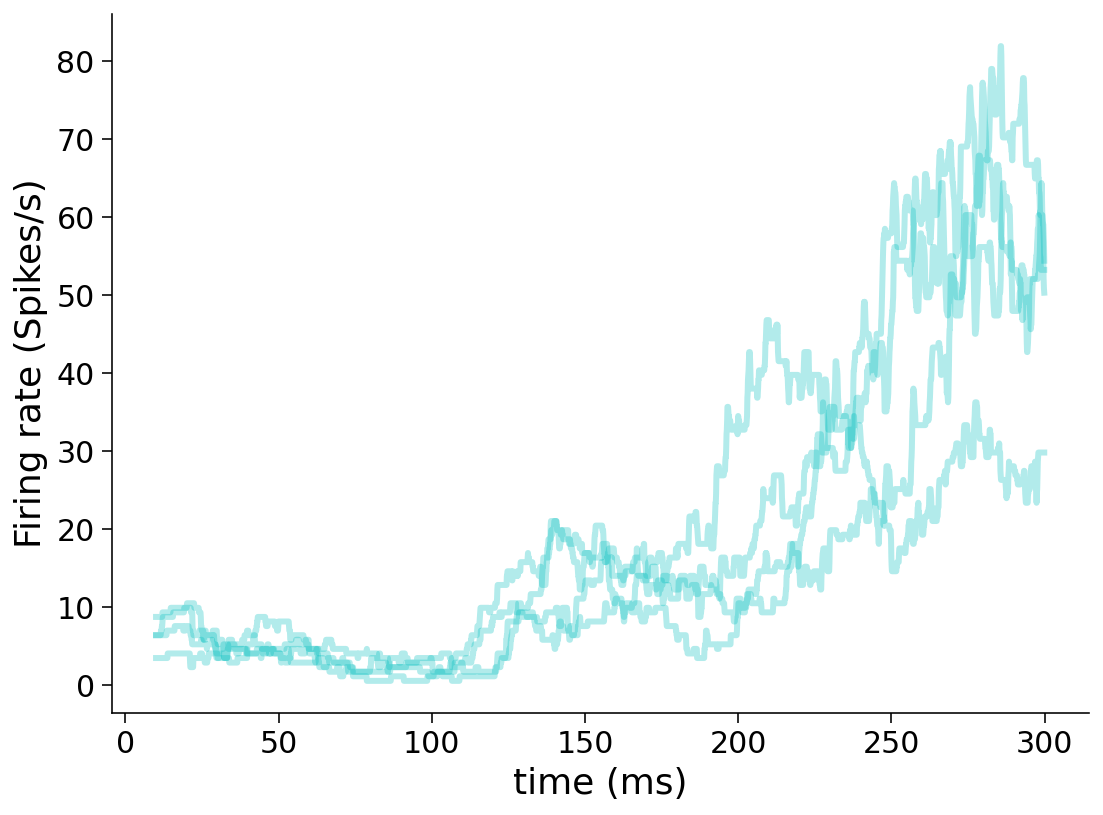

In [7]:
rate_a = data[0]['pop_rate_a']
rate_b = data[1]['pop_rate_a']
time = data[0]['time']
plt.rcParams['font.size'] = 18

    
    
plt.plot(time[100:3000], data[0]['pop_rate_a'][100:3000], 'c', alpha = 0.3, linewidth= 3)
plt.plot(time[100:3000], data[1]['pop_rate_a'][100:3000], 'c', alpha = 0.3, linewidth= 3)
plt.plot(time[100:3000], data[2]['pop_rate_a'][100:3000], 'c', alpha = 0.3, linewidth= 3)
plt.plot(time[100:3000], data[3]['pop_rate_a'][100:3000], 'c', alpha = 0.3, linewidth= 3)

plt.ylabel('Firing rate (Spikes/s)')
plt.xlabel('time (ms)')
plt.show()

In [8]:
def overlap_rate(data, start, end, trial_num):
    time = data[0]['time']

    for i in range(trial_num):
        
        plt.plot(time[start:end], data[i]['pop_rate_a'][start:end], 'c', alpha = 0.1, linewidth= 3)
        
    plt.ylabel('Firing rate (Spikes/s)')
    plt.xlabel('time (ms)')
    plt.show()


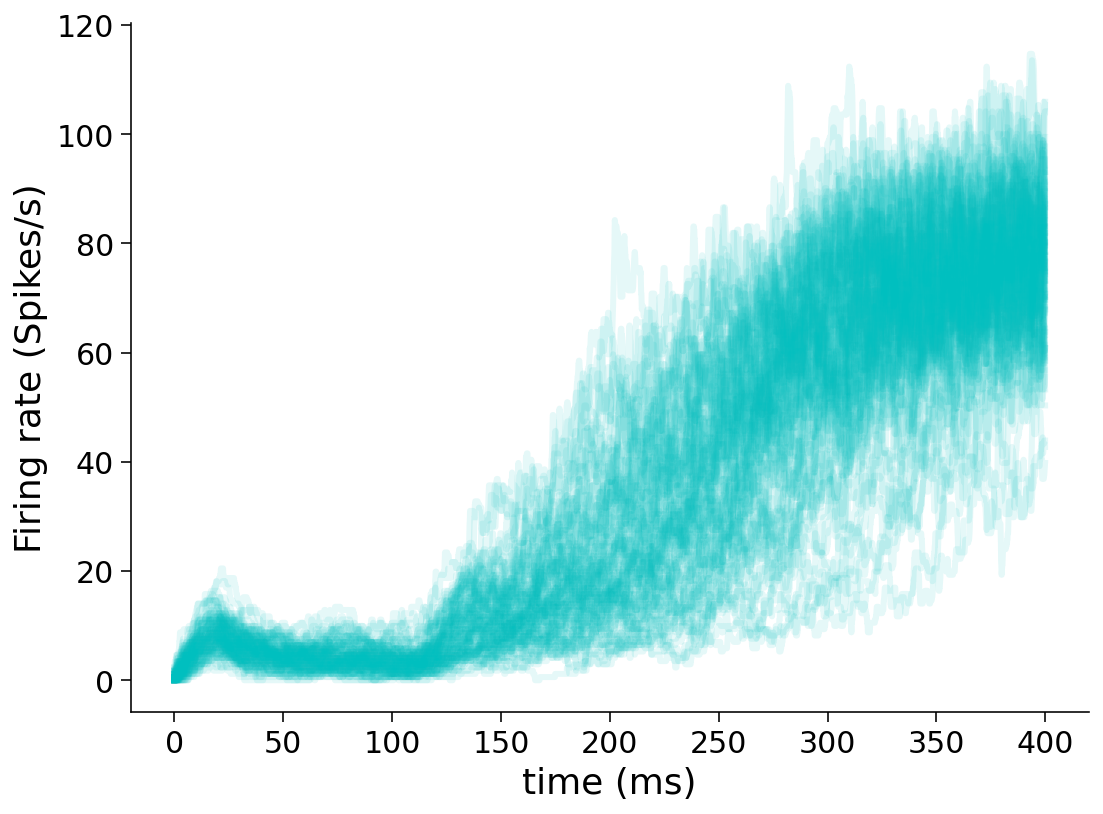

In [11]:
overlap_rate(data, 0, 4000, 100)

In [13]:
type(rt)

list

In [15]:
rt.sort()

In [16]:
100_decision_time_0810_15_55

[1354,
 1355,
 1376,
 1409,
 1460,
 1487,
 1494,
 1502,
 1526,
 1551,
 1564,
 1587,
 1594,
 1603,
 1605,
 1614,
 1624,
 1640,
 1661,
 1669,
 1681,
 1694,
 1695,
 1697,
 1703,
 1715,
 1726,
 1754,
 1781,
 1811,
 1832,
 1849,
 1863,
 1864,
 1873,
 1883,
 1897,
 1914,
 1929,
 1935,
 1972,
 1975,
 1979,
 1983,
 2022,
 2032,
 2032,
 2035,
 2040,
 2063,
 2066,
 2070,
 2082,
 2091,
 2093,
 2112,
 2120,
 2123,
 2141,
 2156,
 2162,
 2182,
 2190,
 2197,
 2218,
 2224,
 2231,
 2241,
 2247,
 2267,
 2297,
 2341,
 2342,
 2358,
 2386,
 2388,
 2413,
 2416,
 2433,
 2439,
 2442,
 2445,
 2530,
 2546,
 2602,
 2615,
 2622,
 2644,
 2655,
 2729,
 2787,
 2832,
 2835,
 2845,
 2947,
 3155,
 3183,
 3238,
 3494,
 3508]

In [17]:
rt[50]

2066

In [18]:
with open('100_decision_time_0810_15_55.pkl', 'rb') as f:
    reaction_time = pickle.load(f)

In [20]:
rt_np =  numpy.array(reaction_time)


In [23]:
rt_np_sort = rt_np.argsort()


In [24]:
rt_np_sort

array([93, 51, 94,  6, 70, 46, 42, 27, 50,  7, 39, 24, 55, 33, 74, 30, 96,
       63, 69, 65, 78, 44, 80, 71, 29, 66, 79, 60, 45, 12, 22, 14, 57, 56,
       49, 76, 98, 82,  2, 85, 54, 89, 25, 92, 41,  4, 97, 83, 84,  8, 48,
       32,  0, 77, 40, 15, 19, 72, 20, 52, 90, 37, 87, 26, 18, 17, 10, 21,
        3, 34, 61, 67, 68, 23, 38, 86, 16, 62,  1, 36, 58, 95, 75,  9, 47,
       13, 99, 31, 11,  5, 73, 59, 81, 53, 88, 28, 35, 64, 91, 43],
      dtype=int64)

In [29]:
rt_np[rt_np_sort[50]]

2066

In [27]:
len(rt_np_sort)

100

In [ ]:
rt_np

In [25]:
rt_np[rt_np_sort]

array([1354, 1355, 1376, 1409, 1460, 1487, 1494, 1502, 1526, 1551, 1564,
       1587, 1594, 1603, 1605, 1614, 1624, 1640, 1661, 1669, 1681, 1694,
       1695, 1697, 1703, 1715, 1726, 1754, 1781, 1811, 1832, 1849, 1863,
       1864, 1873, 1883, 1897, 1914, 1929, 1935, 1972, 1975, 1979, 1983,
       2022, 2032, 2032, 2035, 2040, 2063, 2066, 2070, 2082, 2091, 2093,
       2112, 2120, 2123, 2141, 2156, 2162, 2182, 2190, 2197, 2218, 2224,
       2231, 2241, 2247, 2267, 2297, 2341, 2342, 2358, 2386, 2388, 2413,
       2416, 2433, 2439, 2442, 2445, 2530, 2546, 2602, 2615, 2622, 2644,
       2655, 2729, 2787, 2832, 2835, 2845, 2947, 3155, 3183, 3238, 3494,
       3508], dtype=int64)